In [1]:
import numpy as np
from keras import datasets
from keras.utils import np_utils
import keras
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_check = X_test.copy()

In [3]:
y_train[:10] 

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

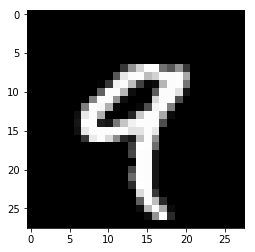

In [4]:
image_array = X_train[4]
image_array.shape
plt.imshow(image_array, cmap='gray', interpolation='None')

In [5]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
L, W, H = X_train.shape


In [8]:
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
import matplotlib.pyplot as plt

In [10]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'])

In [11]:
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'])

In [12]:
from keras.layers import Dense

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
### 상속을 사용한 방식
# class ANN_seq_class(models.Sequential):
#     def __init__(self, Nin, Nh, Nout):
#         super().__init__()
#         self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
#         self.add(layers.Dense(Nout, activation='softmax'))
#         self.compile(loss='categorical_crossentropy',
#                      optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 42us/step - loss: 0.3980 - acc: 0.8916 - val_loss: 0.2156 - val_acc: 0.9388
Epoch 2/15
48000/48000 [==============================] - 2s 32us/step - loss: 0.1944 - acc: 0.9440 - val_loss: 0.1735 - val_acc: 0.9512
Epoch 3/15
48000/48000 [==============================] - 2s 32us/step - loss: 0.1447 - acc: 0.9576 - val_loss: 0.1455 - val_acc: 0.9577
Epoch 4/15
48000/48000 [==============================] - 2s 32us/step - loss: 0.1135 - acc: 0.9677 - val_loss: 0.1263 - val_acc: 0.9633
Epoch 5/15
48000/48000 [==============================] - 2s 32us/step - loss: 0.0931 - acc: 0.9733 - val_loss: 0.1121 - val_acc: 0.9673
Epoch 6/15
48000/48000 [==============================] - 2s 32us/step - loss: 0.0785 - acc: 0.9774 - val_loss: 0.1103 - val_acc: 0.9671
Epoch 7/15
48000/48000 [==============================] - 2s 33us/step - loss: 0.0660 - acc: 0.9803 - val_loss: 0.1038 - val_acc

In [16]:
performace_test = model.evaluate(X_test, Y_test, batch_size=100)

10000/10000 [==============================] - 0s 21us/step


In [17]:
performace_test

[0.0809276940037671, 0.9758000081777572]

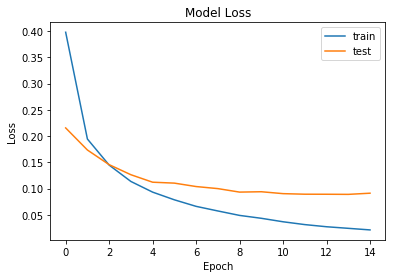

In [18]:
plot_loss(history)

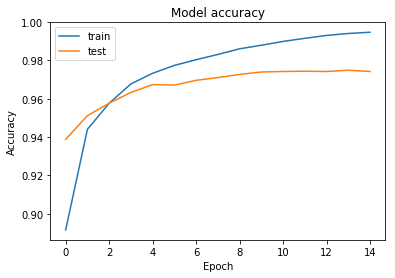

In [19]:
plot_acc(history)

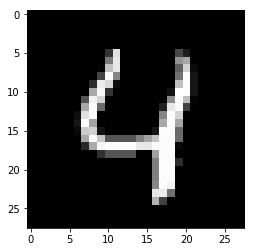

In [20]:
image_array = X_check[4]
image_array.shape
plt.imshow(image_array, cmap='gray', interpolation='None')


In [21]:
input1 = X_check[4].reshape(-1, W * H) / 256

In [33]:
t = model.predict(input1)
t

array([[4.3119737e-08, 1.2066967e-10, 7.2307932e-07, 1.0240717e-09,
        9.9402386e-01, 2.5105555e-08, 2.0257833e-07, 2.5179913e-06,
        5.9949099e-07, 5.9721451e-03]], dtype=float32)

In [25]:
def softmax(x):
    ex_x = np.exp(x - np.max(x))
    return ex_x / np.sum(ex_x)

In [34]:
softmax(t)

array([[0.08541111, 0.0854111 , 0.08541116, 0.0854111 , 0.2307881 ,
        0.0854111 , 0.08541112, 0.08541132, 0.08541115, 0.08592272]],
      dtype=float32)

In [35]:
np.argmax(softmax(t))

4

In [30]:
predict_c = model.predict_classes(input1)
predict_c

array([4], dtype=int64)